In [19]:
import pandas as pd

covid_cases_data=pd.read_csv("covid_confirmed_usafacts.csv")
covid_cases_df=pd.DataFrame(covid_cases_data)
covid_cases_df.head()

,countyFIPS,County Name,State,StateFIPS,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,...,2023-07-14,2023-07-15,2023-07-16,2023-07-17,2023-07-18,2023-07-19,2023-07-20,2023-07-21,2023-07-22,2023-07-23
0,0,Statewide Unallocated,AL,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1001,Autauga County,AL,1,0,0,0,0,0,0,...,19913,19913,19913,19913,19913,19913,19913,19913,19913,19913
2,1003,Baldwin County,AL,1,0,0,0,0,0,0,...,70521,70521,70521,70521,70521,70521,70521,70521,70521,70521
3,1005,Barbour County,AL,1,0,0,0,0,0,0,...,7582,7582,7582,7582,7582,7582,7582,7582,7582,7582
4,1007,Bibb County,AL,1,0,0,0,0,0,0,...,8149,8149,8149,8149,8149,8149,8149,8149,8149,8149


In [20]:
import pandas as pd

covid_deaths_data=pd.read_csv("covid_deaths_usafacts.csv")
covid_deaths_df=pd.DataFrame(covid_deaths_data)
covid_deaths_df.head()

,countyFIPS,County Name,State,StateFIPS,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,...,2023-07-14,2023-07-15,2023-07-16,2023-07-17,2023-07-18,2023-07-19,2023-07-20,2023-07-21,2023-07-22,2023-07-23
0,0,Statewide Unallocated,AL,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1001,Autauga County,AL,1,0,0,0,0,0,0,...,235,235,235,235,235,235,235,235,235,235
2,1003,Baldwin County,AL,1,0,0,0,0,0,0,...,731,731,731,731,731,731,731,731,731,731
3,1005,Barbour County,AL,1,0,0,0,0,0,0,...,104,104,104,104,104,104,104,104,104,104
4,1007,Bibb County,AL,1,0,0,0,0,0,0,...,111,111,111,111,111,111,111,111,111,111


Linear Regression RMSE: 1596074.3607497062
Polynomial Regression RMSE (degree=3): 305498.322237138


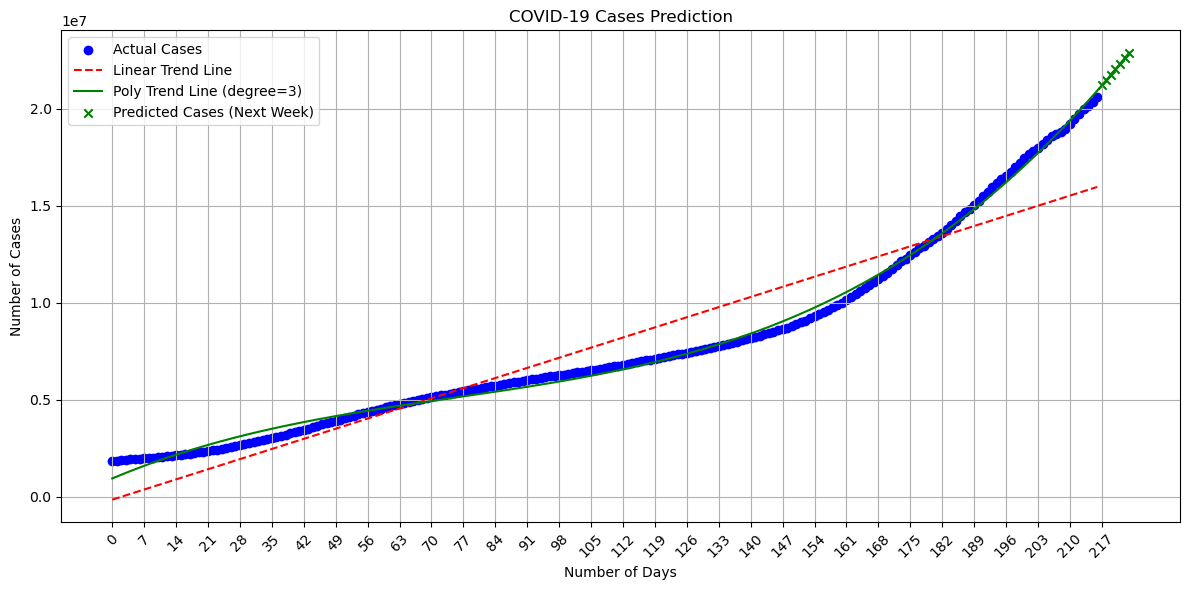

In [21]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Read the COVID-19 cases data
covid_cases_data = pd.read_csv("covid_confirmed_usafacts.csv")

# Filter data for the specified date range
start_date = "2020-06-01"
end_date = "2021-01-03"
date_range = pd.date_range(start_date, end_date).strftime('%Y-%m-%d').tolist()
covid_cases_data = covid_cases_data[['countyFIPS', 'County Name', 'State'] + date_range]

# Prepare data for analysis
cases_data = covid_cases_data[date_range].sum(axis=0).values
days_since_start = np.arange(len(date_range)).reshape(-1, 1)

# Fit linear regression model
reg_linear = LinearRegression().fit(days_since_start, cases_data.reshape(-1, 1))

# Calculate RMSE for linear regression
linear_predictions = reg_linear.predict(days_since_start)
linear_rmse = np.sqrt(mean_squared_error(cases_data, linear_predictions))

# Fit polynomial regression model
degree = 3  # Change this if you want
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(days_since_start)
reg_poly = LinearRegression().fit(X_poly, cases_data.reshape(-1, 1))

# Calculate RMSE for polynomial regression
poly_predictions = reg_poly.predict(X_poly)
poly_rmse = np.sqrt(mean_squared_error(cases_data, poly_predictions))

# Print RMSE values
print(f"Linear Regression RMSE: {linear_rmse}")
print(f"Polynomial Regression RMSE (degree={degree}): {poly_rmse}")

# Plotting
plt.figure(figsize=(12, 6))

# Plot actual data
plt.scatter(days_since_start, cases_data, color='blue', label='Actual Cases')

# Plot linear regression trend line
plt.plot(days_since_start, reg_linear.predict(days_since_start), color='red', linestyle='--', label='Linear Trend Line')

# Plot polynomial regression trend line
X_plot_poly = poly_features.transform(np.arange(len(date_range) + 7).reshape(-1, 1))
plt.plot(np.arange(len(date_range) + 7), reg_poly.predict(X_plot_poly), color='green', label=f'Poly Trend Line (degree={degree})')

# Predictions for the next week
days_future = np.arange(len(date_range), len(date_range) + 7).reshape(-1, 1)
X_future_poly = poly_features.transform(days_future)
cases_pred = reg_poly.predict(X_future_poly)

# Plotting predictions
plt.scatter(days_future, cases_pred, color='green', marker='x', label='Predicted Cases (Next Week)')

plt.xlabel('Number of Days')
plt.ylabel('Number of Cases')
plt.title('COVID-19 Cases Prediction')
plt.legend()
plt.grid(True)
plt.xticks(np.arange(0, len(date_range) + 7, 7), rotation=45)
plt.tight_layout()
plt.show()

TODO: Discuss bias versus variance tradeoff.
      Describe the trends as compared to other countries.

Linear Regression RMSE: 13545.924691430659
Polynomial Regression RMSE (degree=3): 4762.935748761432


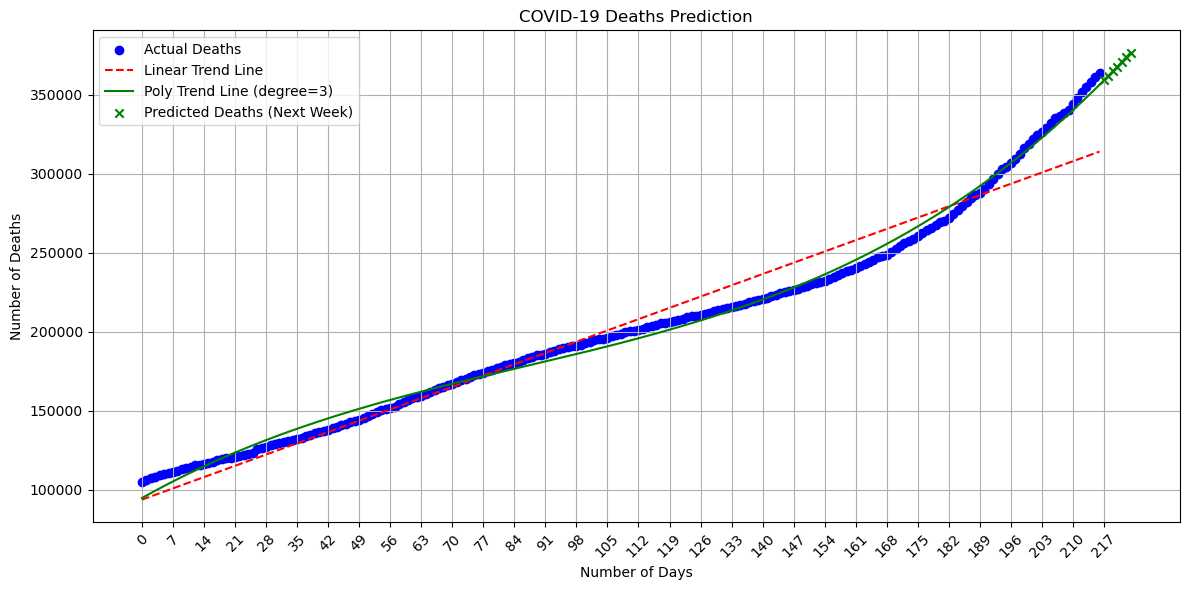

In [22]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Read the COVID-19 deaths data
covid_deaths_data = pd.read_csv("covid_deaths_usafacts.csv")

# Filter data for the specified date range
start_date = "2020-06-01"
end_date = "2021-01-03"
date_range = pd.date_range(start_date, end_date).strftime('%Y-%m-%d').tolist()
covid_deaths_data = covid_deaths_data[['countyFIPS', 'County Name', 'State'] + date_range]

# Prepare data for analysis
deaths_data = covid_deaths_data[date_range].sum(axis=0).values
days_since_start = np.arange(len(date_range)).reshape(-1, 1)

# Fit linear regression model
reg_linear = LinearRegression().fit(days_since_start, deaths_data.reshape(-1, 1))

# Calculate RMSE for linear regression
linear_predictions = reg_linear.predict(days_since_start)
linear_rmse = np.sqrt(mean_squared_error(deaths_data, linear_predictions))

# Fit polynomial regression model
degree = 3  # Change this if you want
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(days_since_start)
reg_poly = LinearRegression().fit(X_poly, deaths_data.reshape(-1, 1))

# Calculate RMSE for polynomial regression
poly_predictions = reg_poly.predict(X_poly)
poly_rmse = np.sqrt(mean_squared_error(deaths_data, poly_predictions))

# Print RMSE values
print(f"Linear Regression RMSE: {linear_rmse}")
print(f"Polynomial Regression RMSE (degree={degree}): {poly_rmse}")

# Plotting
plt.figure(figsize=(12, 6))

# Plot actual data
plt.scatter(days_since_start, deaths_data, color='blue', label='Actual Deaths')

# Plot linear regression trend line
plt.plot(days_since_start, reg_linear.predict(days_since_start), color='red', linestyle='--', label='Linear Trend Line')

# Plot polynomial regression trend line
X_plot_poly = poly_features.transform(np.arange(len(date_range) + 7).reshape(-1, 1))
plt.plot(np.arange(len(date_range) + 7), reg_poly.predict(X_plot_poly), color='green', label=f'Poly Trend Line (degree={degree})')

# Predictions for the next week
days_future = np.arange(len(date_range), len(date_range) + 7).reshape(-1, 1)
X_future_poly = poly_features.transform(days_future)
deaths_pred = reg_poly.predict(X_future_poly)

# Plotting predictions
plt.scatter(days_future, deaths_pred, color='green', marker='x', label='Predicted Deaths (Next Week)')

plt.xlabel('Number of Days')
plt.ylabel('Number of Deaths')
plt.title('COVID-19 Deaths Prediction')
plt.legend()
plt.grid(True)
plt.xticks(np.arange(0, len(date_range) + 7, 7), rotation=45)
plt.tight_layout()
plt.show()

TODO: Discuss bias versus variance tradeoff.
      Describe the trends as compared to other countries.

Linear Regression RMSE for NJ: 49034.32916973638
Polynomial Regression RMSE for NJ (degree=3): 6784.317444979545


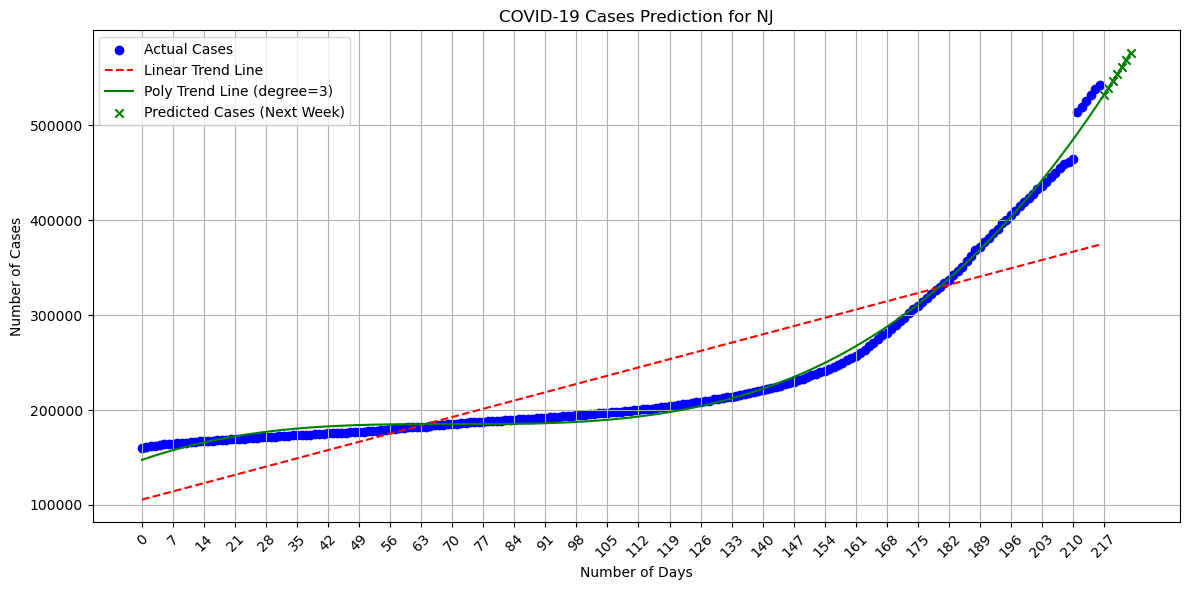

In [26]:
############################################################################################################################
############################################# MEMBER TASKS, CASES ##########################################################
############################################################################################################################

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Read the COVID-19 cases data
covid_cases_data = pd.read_csv("covid_confirmed_usafacts.csv")

# Filter by state
covid_cases_data = covid_cases_data[covid_cases_data['State'] == 'NJ']

# Filter data for the specified date range
start_date = "2020-06-01"
end_date = "2021-01-03"
date_range = pd.date_range(start_date, end_date).strftime('%Y-%m-%d').tolist()
covid_cases_data = covid_cases_data[['countyFIPS', 'County Name', 'State'] + date_range]

# Prepare data for analysis
cases_data = covid_cases_data[date_range].sum(axis=0).values
days_since_start = np.arange(len(date_range)).reshape(-1, 1)

# Fit linear regression model
reg_linear = LinearRegression().fit(days_since_start, cases_data.reshape(-1, 1))

# Calculate RMSE for linear regression
linear_predictions = reg_linear.predict(days_since_start)
linear_rmse = np.sqrt(mean_squared_error(cases_data, linear_predictions))

# Fit polynomial regression model
degree = 3  # Change this if you want
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(days_since_start)
reg_poly = LinearRegression().fit(X_poly, cases_data.reshape(-1, 1))

# Calculate RMSE for polynomial regression
poly_predictions = reg_poly.predict(X_poly)
poly_rmse = np.sqrt(mean_squared_error(cases_data, poly_predictions))

# Print RMSE values
print(f"Linear Regression RMSE for NJ: {linear_rmse}")
print(f"Polynomial Regression RMSE for NJ (degree={degree}): {poly_rmse}")

# Plotting
plt.figure(figsize=(12, 6))

# Plot actual data
plt.scatter(days_since_start, cases_data, color='blue', label='Actual Cases')

# Plot linear regression trend line
plt.plot(days_since_start, reg_linear.predict(days_since_start), color='red', linestyle='--', label='Linear Trend Line')

# Plot polynomial regression trend line
X_plot_poly = poly_features.transform(np.arange(len(date_range) + 7).reshape(-1, 1))
plt.plot(np.arange(len(date_range) + 7), reg_poly.predict(X_plot_poly), color='green', label=f'Poly Trend Line (degree={degree})')

# Predictions for the next week
days_future = np.arange(len(date_range), len(date_range) + 7).reshape(-1, 1)
X_future_poly = poly_features.transform(days_future)
cases_pred = reg_poly.predict(X_future_poly)

# Plotting predictions
plt.scatter(days_future, cases_pred, color='green', marker='x', label='Predicted Cases (Next Week)')

plt.xlabel('Number of Days')
plt.ylabel('Number of Cases')
plt.title('COVID-19 Cases Prediction for NJ')
plt.legend()
plt.grid(True)
plt.xticks(np.arange(0, len(date_range) + 7, 7), rotation=45)
plt.tight_layout()
plt.show()

Linear Regression RMSE: 740.0197842776906
Polynomial Regression RMSE (degree=3): 276.40750507925344


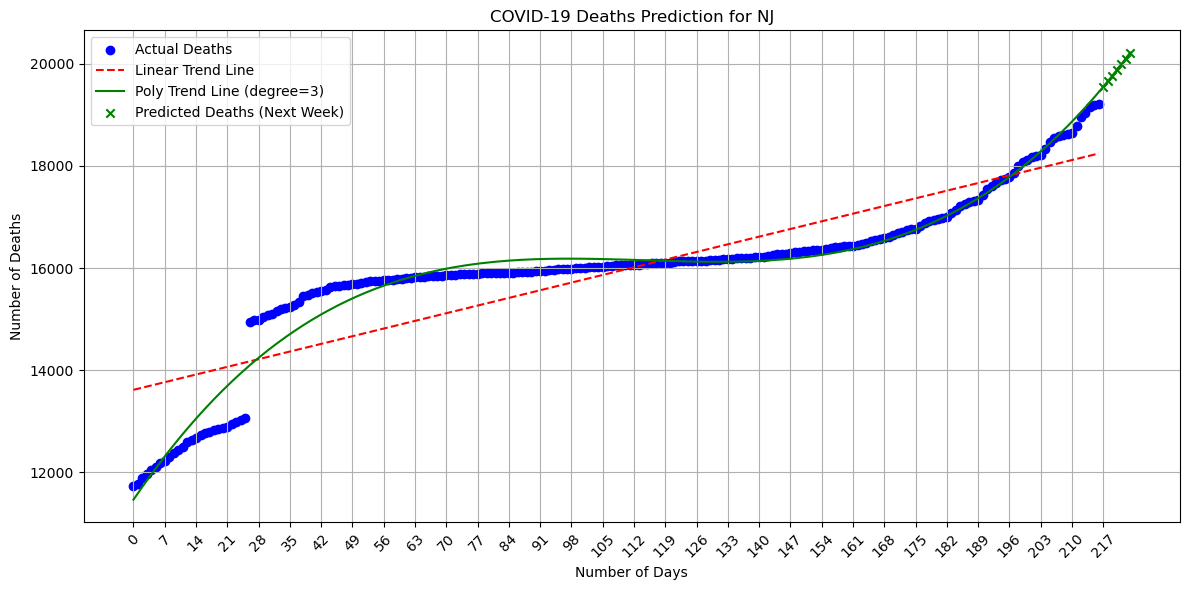

In [28]:
############################################################################################################################
############################################# MEMBER TASKS, DEATHS #########################################################
############################################################################################################################
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Read the COVID-19 deaths data
covid_deaths_data = pd.read_csv("covid_deaths_usafacts.csv")

# Filter by state
covid_deaths_data = covid_deaths_data[covid_deaths_data['State'] == 'NJ']

# Filter data for the specified date range
start_date = "2020-06-01"
end_date = "2021-01-03"
date_range = pd.date_range(start_date, end_date).strftime('%Y-%m-%d').tolist()
covid_deaths_data = covid_deaths_data[['countyFIPS', 'County Name', 'State'] + date_range]

# Prepare data for analysis
deaths_data = covid_deaths_data[date_range].sum(axis=0).values
days_since_start = np.arange(len(date_range)).reshape(-1, 1)

# Fit linear regression model
reg_linear = LinearRegression().fit(days_since_start, deaths_data.reshape(-1, 1))

# Calculate RMSE for linear regression
linear_predictions = reg_linear.predict(days_since_start)
linear_rmse = np.sqrt(mean_squared_error(deaths_data, linear_predictions))

# Fit polynomial regression model
degree = 3  # Change this if you want
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(days_since_start)
reg_poly = LinearRegression().fit(X_poly, deaths_data.reshape(-1, 1))

# Calculate RMSE for polynomial regression
poly_predictions = reg_poly.predict(X_poly)
poly_rmse = np.sqrt(mean_squared_error(deaths_data, poly_predictions))

# Print RMSE values
print(f"Linear Regression RMSE: {linear_rmse}")
print(f"Polynomial Regression RMSE (degree={degree}): {poly_rmse}")

# Plotting
plt.figure(figsize=(12, 6))

# Plot actual data
plt.scatter(days_since_start, deaths_data, color='blue', label='Actual Deaths')

# Plot linear regression trend line
plt.plot(days_since_start, reg_linear.predict(days_since_start), color='red', linestyle='--', label='Linear Trend Line')

# Plot polynomial regression trend line
X_plot_poly = poly_features.transform(np.arange(len(date_range) + 7).reshape(-1, 1))
plt.plot(np.arange(len(date_range) + 7), reg_poly.predict(X_plot_poly), color='green', label=f'Poly Trend Line (degree={degree})')

# Predictions for the next week
days_future = np.arange(len(date_range), len(date_range) + 7).reshape(-1, 1)
X_future_poly = poly_features.transform(days_future)
deaths_pred = reg_poly.predict(X_future_poly)

# Plotting predictions
plt.scatter(days_future, deaths_pred, color='green', marker='x', label='Predicted Deaths (Next Week)')

plt.xlabel('Number of Days')
plt.ylabel('Number of Deaths')
plt.title('COVID-19 Deaths Prediction for NJ')
plt.legend()
plt.grid(True)
plt.xticks(np.arange(0, len(date_range) + 7, 7), rotation=45)
plt.tight_layout()
plt.show()

In [29]:
import pandas as pd

# Read the COVID-19 deaths data
covid_deaths_data = pd.read_csv("covid_deaths_usafacts.csv")

# Filter data for the state of 'NJ'
covid_deaths_data_nj = covid_deaths_data[covid_deaths_data['State'] == 'NJ']

# Calculate total deaths for each county
county_deaths = covid_deaths_data_nj.groupby('County Name')[date_range].sum()

# Sum up deaths across the date range for each county
county_deaths['Total Deaths'] = county_deaths.sum(axis=1)

# Sort counties based on total deaths
county_deaths_sorted = county_deaths.sort_values(by='Total Deaths', ascending=False)

# Get the top 5 counties with the most deaths
top_5_counties_deaths = county_deaths_sorted.head(5)

print("Top 5 Counties with the Most Deaths in New Jersey:")
print(top_5_counties_deaths[['Total Deaths']])

Top 5 Counties with the Most Deaths in New Jersey:
                   Total Deaths
County Name                    
Essex County             457026
Bergen County            440066
Hudson County            325770
Middlesex County         304401
Union County             293418


In [30]:
import pandas as pd

# Read the COVID-19 cases data
covid_cases_data = pd.read_csv("covid_confirmed_usafacts.csv")

# Filter data for the state of 'NJ'
covid_cases_data_nj = covid_cases_data[covid_cases_data['State'] == 'NJ']

# Calculate total cases for each county
county_cases = covid_cases_data_nj.groupby('County Name')[date_range].sum()

# Sum up cases across the date range for each county
county_cases['Total Cases'] = county_cases.sum(axis=1)

# Sort counties based on total cases
county_cases_sorted = county_cases.sort_values(by='Total Cases', ascending=False)

# Get the top 5 counties with the most cases
top_5_counties_cases = county_cases_sorted.head(5)

print("Top 5 Counties with the Most Cases in New Jersey:")
print(top_5_counties_cases[['Total Cases']])

Top 5 Counties with the Most Cases in New Jersey:
                   Total Cases
County Name                   
Bergen County          5579823
Essex County           5454643
Hudson County          5211610
Middlesex County       4924266
Passaic County         4771133


Linear Regression RMSE for NJ: 4427.9679723435975
Polynomial Regression RMSE for NJ (degree=3): 674.151649117472


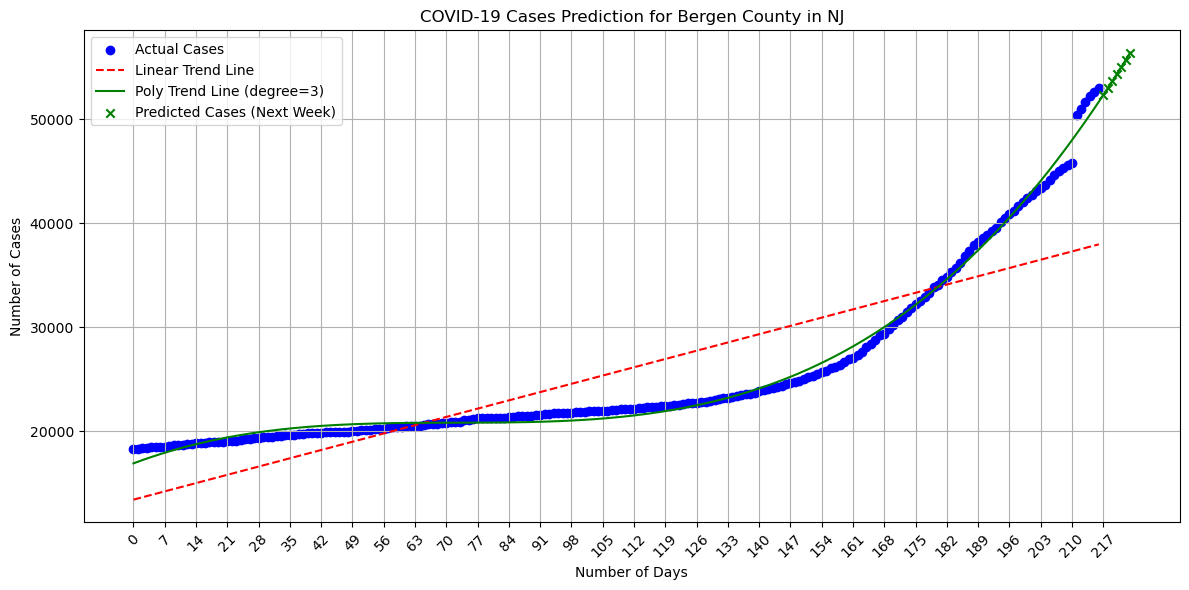

In [57]:
############################################################################################################################
####################################### THIS IS JUST BERGEN, DONT USE ######################################################
############################################################################################################################

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Read the COVID-19 cases data
covid_cases_data = pd.read_csv("covid_confirmed_usafacts.csv")

# Filter by state
covid_cases_data = covid_cases_data[covid_cases_data['State'] == 'NJ']

# Filter by county
covid_cases_data = covid_cases_data[covid_cases_data['County Name'] == 'Bergen County ']

# Filter data for the specified date range
start_date = "2020-06-01"
end_date = "2021-01-03"
date_range = pd.date_range(start_date, end_date).strftime('%Y-%m-%d').tolist()
covid_cases_data = covid_cases_data[['countyFIPS', 'County Name', 'State'] + date_range]

# Prepare data for analysis
cases_data = covid_cases_data[date_range].sum(axis=0).values
days_since_start = np.arange(len(date_range)).reshape(-1, 1)

# Fit linear regression model
reg_linear = LinearRegression().fit(days_since_start, cases_data.reshape(-1, 1))

# Calculate RMSE for linear regression
linear_predictions = reg_linear.predict(days_since_start)
linear_rmse = np.sqrt(mean_squared_error(cases_data, linear_predictions))

# Fit polynomial regression model
degree = 3  # Change this if you want
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(days_since_start)
reg_poly = LinearRegression().fit(X_poly, cases_data.reshape(-1, 1))

# Calculate RMSE for polynomial regression
poly_predictions = reg_poly.predict(X_poly)
poly_rmse = np.sqrt(mean_squared_error(cases_data, poly_predictions))

# Print RMSE values
print(f"Linear Regression RMSE for NJ: {linear_rmse}")
print(f"Polynomial Regression RMSE for NJ (degree={degree}): {poly_rmse}")

# Plotting
plt.figure(figsize=(12, 6))

# Plot actual data
plt.scatter(days_since_start, cases_data, color='blue', label='Actual Cases')

# Plot linear regression trend line
plt.plot(days_since_start, reg_linear.predict(days_since_start), color='red', linestyle='--', label='Linear Trend Line')

# Plot polynomial regression trend line
X_plot_poly = poly_features.transform(np.arange(len(date_range) + 7).reshape(-1, 1))
plt.plot(np.arange(len(date_range) + 7), reg_poly.predict(X_plot_poly), color='green', label=f'Poly Trend Line (degree={degree})')

# Predictions for the next week
days_future = np.arange(len(date_range), len(date_range) + 7).reshape(-1, 1)
X_future_poly = poly_features.transform(days_future)
cases_pred = reg_poly.predict(X_future_poly)

# Plotting predictions
plt.scatter(days_future, cases_pred, color='green', marker='x', label='Predicted Cases (Next Week)')

plt.xlabel('Number of Days')
plt.ylabel('Number of Cases')
plt.title('COVID-19 Cases Prediction for Bergen County in NJ')
plt.legend()
plt.grid(True)
plt.xticks(np.arange(0, len(date_range) + 7, 7), rotation=45)
plt.tight_layout()
plt.show()

In [46]:
import pandas as pd

covid_cases_data=pd.read_csv("covid_confirmed_usafacts.csv")
covid_cases_df=pd.DataFrame(covid_cases_data)
newjersey_data=covid_cases_df[covid_cases_df['State']=='NJ']
newjersey_data=covid_cases_df[covid_cases_df['County Name']=='Union County ']
print("Number of rows:", newjersey_data.shape[0])
print("Number of columns:", newjersey_data.shape[1])

newjersey_data.head(22)

Number of rows: 17
Number of columns: 1269


,countyFIPS,County Name,State,StateFIPS,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,...,2023-07-14,2023-07-15,2023-07-16,2023-07-17,2023-07-18,2023-07-19,2023-07-20,2023-07-21,2023-07-22,2023-07-23
184,5139,Union County,AR,5,0,0,0,0,0,0,...,11312,11312,11312,11312,11312,11312,11312,11312,11312,11312
392,12125,Union County,FL,12,0,0,0,0,0,0,...,5140,5140,5140,5140,5140,5140,5140,5140,5140,5140
541,13291,Union County,GA,13,0,0,0,0,0,0,...,5413,5413,5413,5413,5413,5413,5413,5413,5413,5413
699,17181,Union County,IL,17,0,0,0,0,0,0,...,6699,6699,6699,6699,6699,6699,6699,6699,6699,6699
792,18161,Union County,IN,18,0,0,0,0,0,0,...,2046,2046,2046,2046,2046,2046,2046,2046,2046,2046
892,19175,Union County,IA,19,0,0,0,0,0,0,...,3144,3144,3144,3144,3144,3144,3144,3144,3144,3144
1123,21225,Union County,KY,21,0,0,0,0,0,0,...,5450,5450,5450,5450,5450,5450,5450,5450,5450,5450
1498,28145,Union County,MS,28,0,0,0,0,0,0,...,11785,11785,11785,11785,11785,11785,11785,11785,11785,11785
1824,34039,Union County,NJ,34,0,0,0,0,0,0,...,193462,193462,193462,193462,193462,193462,193462,193462,193462,193462
1858,35059,Union County,NM,35,0,0,0,0,0,0,...,963,963,963,963,963,963,963,963,963,963


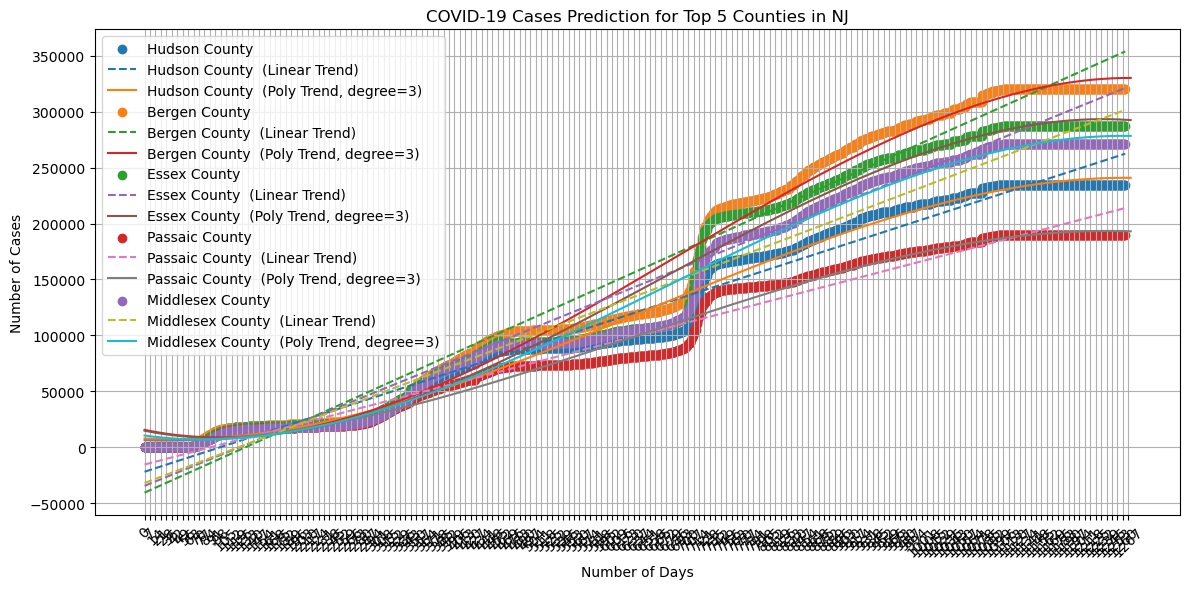

Hudson County  - Linear Regression RMSE: 14353.555289444164, Polynomial Regression RMSE (degree=3): 10374.611789667384
Bergen County  - Linear Regression RMSE: 21837.986946945002, Polynomial Regression RMSE (degree=3): 13914.09410623332
Essex County  - Linear Regression RMSE: 21357.389058712637, Polynomial Regression RMSE (degree=3): 14697.443318226902
Passaic County  - Linear Regression RMSE: 11664.552496204926, Polynomial Regression RMSE (degree=3): 8427.898871250629
Middlesex County  - Linear Regression RMSE: 17664.14437558371, Polynomial Regression RMSE (degree=3): 11736.95028454862


In [58]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Read the COVID-19 cases data
covid_cases_data = pd.read_csv("covid_confirmed_usafacts.csv")

# Filter data for the state of 'NJ'
covid_cases_data_nj = covid_cases_data[covid_cases_data['State'] == 'NJ']

# Calculate total cases for each county
county_cases = covid_cases_data_nj.groupby('County Name').sum()

# Sort counties based on total cases
county_cases_sorted = county_cases.sort_values(by='2020-06-01', ascending=False)

# Get the top 5 counties with the most cases
top_5_counties = county_cases_sorted.head(5)

# Select only date columns for the analysis
date_columns = top_5_counties.columns[4:]  # Assuming date columns start from the 5th column

# Prepare data for analysis
cases_data = top_5_counties[date_columns].values
days_since_start = np.arange(len(date_columns)).reshape(-1, 1)

# Initialize lists to store RMSE values for linear and polynomial regression
linear_rmse_list = []
poly_rmse_list = []

# Plotting
plt.figure(figsize=(12, 6))

for county_name, county_cases_data in top_5_counties.iterrows():
    # Fit linear regression model
    reg_linear = LinearRegression().fit(days_since_start, county_cases_data[date_columns].values.reshape(-1, 1))
    linear_predictions = reg_linear.predict(days_since_start)
    linear_rmse = np.sqrt(mean_squared_error(county_cases_data[date_columns].values, linear_predictions))
    linear_rmse_list.append(linear_rmse)

    # Fit polynomial regression model
    degree = 3  # Change this if you want
    poly_features = PolynomialFeatures(degree=degree)
    X_poly = poly_features.fit_transform(days_since_start)
    reg_poly = LinearRegression().fit(X_poly, county_cases_data[date_columns].values.reshape(-1, 1))
    poly_predictions = reg_poly.predict(X_poly)
    poly_rmse = np.sqrt(mean_squared_error(county_cases_data[date_columns].values, poly_predictions))
    poly_rmse_list.append(poly_rmse)

    # Plot actual data
    plt.scatter(days_since_start, county_cases_data[date_columns].values, label=county_name)

    # Plot linear regression trend line
    plt.plot(days_since_start, reg_linear.predict(days_since_start), linestyle='--', label=f'{county_name} (Linear Trend)')

    # Plot polynomial regression trend line
    X_plot_poly = poly_features.transform(np.arange(len(date_columns) + 7).reshape(-1, 1))
    plt.plot(np.arange(len(date_columns) + 7), reg_poly.predict(X_plot_poly), label=f'{county_name} (Poly Trend, degree={degree})')

plt.xlabel('Number of Days')
plt.ylabel('Number of Cases')
plt.title('COVID-19 Cases Prediction for Top 5 Counties in NJ')
plt.legend()
plt.grid(True)
plt.xticks(np.arange(0, len(date_columns) + 7, 7), rotation=45)
plt.tight_layout()
plt.show()

# Print RMSE values
for i, county_name in enumerate(top_5_counties.index):
    print(f"{county_name} - Linear Regression RMSE: {linear_rmse_list[i]}, Polynomial Regression RMSE (degree={degree}): {poly_rmse_list[i]}")

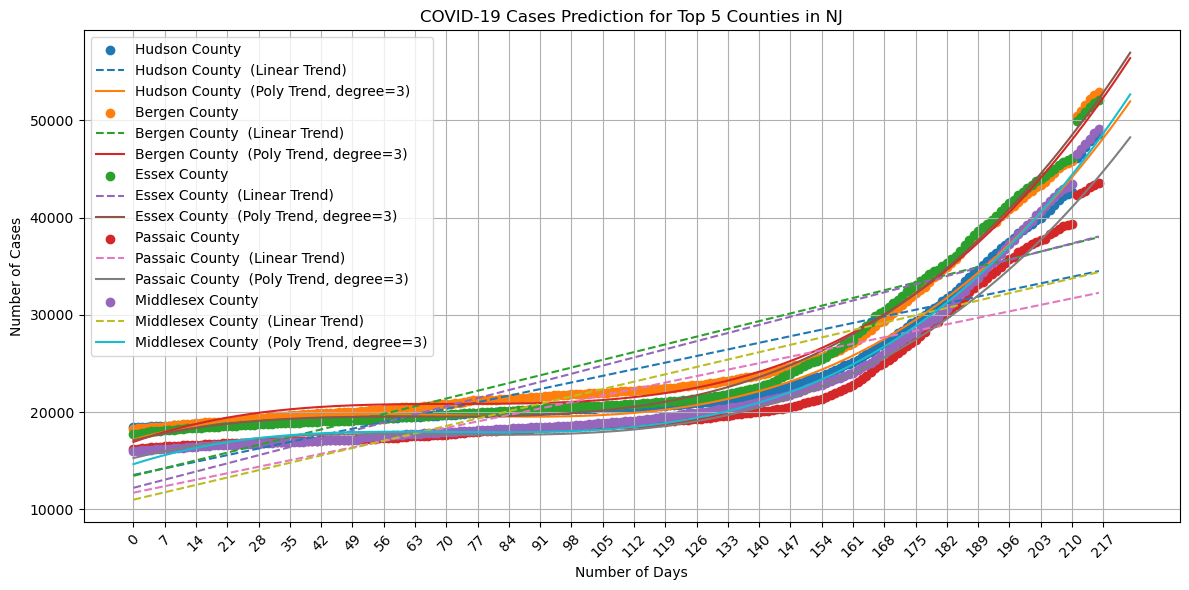

Hudson County  - Linear Regression RMSE: 4247.505070330437, Polynomial Regression RMSE (degree=3): 547.6618463503535
Bergen County  - Linear Regression RMSE: 4427.9679723435975, Polynomial Regression RMSE (degree=3): 674.151649117472
Essex County  - Linear Regression RMSE: 4715.093368401734, Polynomial Regression RMSE (degree=3): 589.1054174779657
Passaic County  - Linear Regression RMSE: 3932.3576549048994, Polynomial Regression RMSE (degree=3): 633.7142161570378
Middlesex County  - Linear Regression RMSE: 4410.671355414672, Polynomial Regression RMSE (degree=3): 563.2259970331518


In [66]:
############################################################################################################################
######################################## USE THIS, HAS CORRECT DATE RANGE ##################################################
############################################################################################################################
############################################################################################################################
###################################### MEMBER TASKS, CASES BY TOP 5 COUNTY #################################################
############################################################################################################################

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Read the COVID-19 cases data
covid_cases_data = pd.read_csv("covid_confirmed_usafacts.csv")

# Filter data for the state of 'NJ'
covid_cases_data_nj = covid_cases_data[covid_cases_data['State'] == 'NJ']

# Calculate total cases for each county
county_cases = covid_cases_data_nj.groupby('County Name').sum()

# Sort counties based on total cases
county_cases_sorted = county_cases.sort_values(by='2020-06-01', ascending=False)

# Get the top 5 counties with the most cases
top_5_counties = county_cases_sorted.head(5)

# Select only date columns within the specified range
start_date = "2020-06-01"
end_date = "2021-01-03"
date_columns = pd.date_range(start=start_date, end=end_date).strftime('%Y-%m-%d')

# Prepare data for analysis
cases_data = top_5_counties[date_columns].values
days_since_start = np.arange(len(date_columns)).reshape(-1, 1)

# Initialize lists to store RMSE values for linear and polynomial regression
linear_rmse_list = []
poly_rmse_list = []

# Plotting
plt.figure(figsize=(12, 6))

for county_name, county_cases_data in top_5_counties.iterrows():
    # Fit linear regression model
    reg_linear = LinearRegression().fit(days_since_start, county_cases_data[date_columns].values.reshape(-1, 1))
    linear_predictions = reg_linear.predict(days_since_start)
    linear_rmse = np.sqrt(mean_squared_error(county_cases_data[date_columns].values, linear_predictions))
    linear_rmse_list.append(linear_rmse)

    # Fit polynomial regression model
    degree = 3  # Change this if you want
    poly_features = PolynomialFeatures(degree=degree)
    X_poly = poly_features.fit_transform(days_since_start)
    reg_poly = LinearRegression().fit(X_poly, county_cases_data[date_columns].values.reshape(-1, 1))
    poly_predictions = reg_poly.predict(X_poly)
    poly_rmse = np.sqrt(mean_squared_error(county_cases_data[date_columns].values, poly_predictions))
    poly_rmse_list.append(poly_rmse)

    # Plot actual data
    plt.scatter(days_since_start, county_cases_data[date_columns].values, label=county_name)

    # Plot linear regression trend line
    plt.plot(days_since_start, reg_linear.predict(days_since_start), linestyle='--', label=f'{county_name} (Linear Trend)')

    # Plot polynomial regression trend line
    X_plot_poly = poly_features.transform(np.arange(len(date_columns) + 7).reshape(-1, 1))
    plt.plot(np.arange(len(date_columns) + 7), reg_poly.predict(X_plot_poly), label=f'{county_name} (Poly Trend, degree={degree})')

plt.xlabel('Number of Days')
plt.ylabel('Number of Cases')
plt.title('COVID-19 Cases Prediction for Top 5 Counties in NJ')
plt.legend()
plt.grid(True)
plt.xticks(np.arange(0, len(date_columns) + 7, 7), rotation=45)
plt.tight_layout()
plt.show()

# Print RMSE values
for i, county_name in enumerate(top_5_counties.index):
    print(f"{county_name} - Linear Regression RMSE: {linear_rmse_list[i]}, Polynomial Regression RMSE (degree={degree}): {poly_rmse_list[i]}")

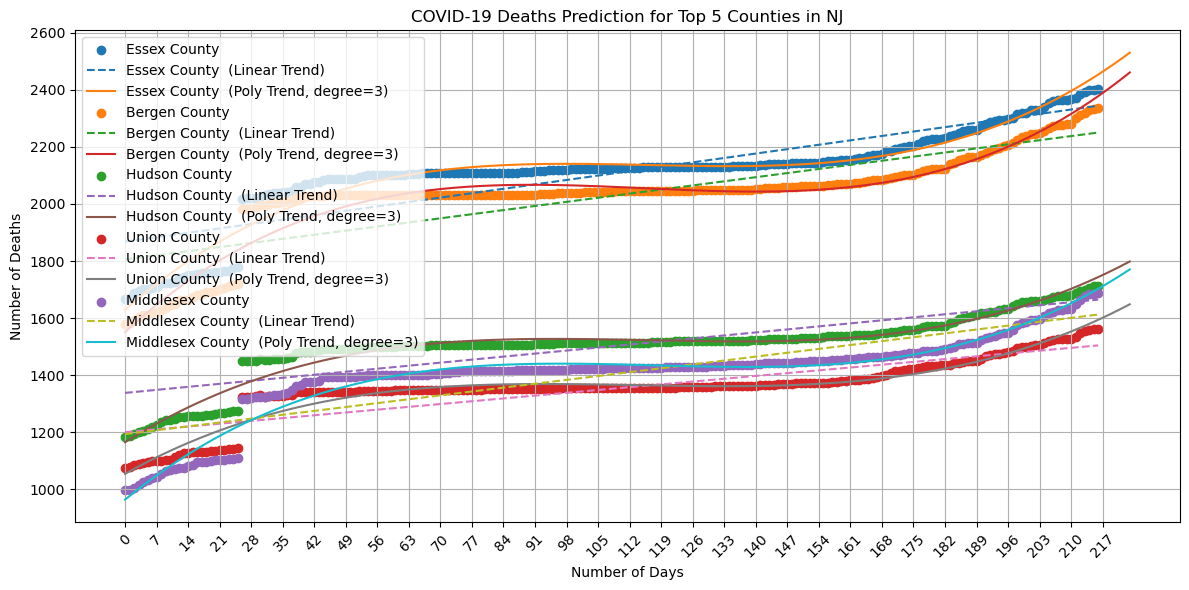

Essex County  - Linear Regression RMSE: 82.0576775779843, Polynomial Regression RMSE (degree=3): 35.61098822734478
Bergen County  - Linear Regression RMSE: 89.79217725692268, Polynomial Regression RMSE (degree=3): 41.3380994206105
Hudson County  - Linear Regression RMSE: 58.85964698328766, Polynomial Regression RMSE (degree=3): 24.855554186326042
Union County  - Linear Regression RMSE: 54.44899623789124, Polynomial Regression RMSE (degree=3): 26.447981494489895
Middlesex County  - Linear Regression RMSE: 75.4623243471779, Polynomial Regression RMSE (degree=3): 28.83040526630237


In [67]:
############################################################################################################################
######################################## USE THIS, HAS CORRECT DATE RANGE ##################################################
############################################################################################################################
############################################################################################################################
###################################### MEMBER TASKS, DEATHS BY TOP 5 COUNTY ################################################
############################################################################################################################

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Read the COVID-19 deaths data
covid_deaths_data = pd.read_csv("covid_deaths_usafacts.csv")

# Filter data for the state of 'NJ'
covid_deaths_data_nj = covid_deaths_data[covid_deaths_data['State'] == 'NJ']

# Calculate total deaths for each county
county_deaths = covid_deaths_data_nj.groupby('County Name').sum()

# Sort counties based on total deaths
county_deaths_sorted = county_deaths.sort_values(by='2020-06-01', ascending=False)

# Get the top 5 counties with the most deaths
top_5_counties = county_deaths_sorted.head(5)

# Select only date columns within the specified range
start_date = "2020-06-01"
end_date = "2021-01-03"
date_columns = pd.date_range(start=start_date, end=end_date).strftime('%Y-%m-%d')

# Prepare data for analysis
deaths_data = top_5_counties[date_columns].values
days_since_start = np.arange(len(date_columns)).reshape(-1, 1)

# Initialize lists to store RMSE values for linear and polynomial regression
linear_rmse_list = []
poly_rmse_list = []

# Plotting
plt.figure(figsize=(12, 6))

for county_name, county_deaths_data in top_5_counties.iterrows():
    # Fit linear regression model
    reg_linear = LinearRegression().fit(days_since_start, county_deaths_data[date_columns].values.reshape(-1, 1))
    linear_predictions = reg_linear.predict(days_since_start)
    linear_rmse = np.sqrt(mean_squared_error(county_deaths_data[date_columns].values, linear_predictions))
    linear_rmse_list.append(linear_rmse)

    # Fit polynomial regression model
    degree = 3  # Change this if you want
    poly_features = PolynomialFeatures(degree=degree)
    X_poly = poly_features.fit_transform(days_since_start)
    reg_poly = LinearRegression().fit(X_poly, county_deaths_data[date_columns].values.reshape(-1, 1))
    poly_predictions = reg_poly.predict(X_poly)
    poly_rmse = np.sqrt(mean_squared_error(county_deaths_data[date_columns].values, poly_predictions))
    poly_rmse_list.append(poly_rmse)

    # Plot actual data
    plt.scatter(days_since_start, county_deaths_data[date_columns].values, label=county_name)

    # Plot linear regression trend line
    plt.plot(days_since_start, reg_linear.predict(days_since_start), linestyle='--', label=f'{county_name} (Linear Trend)')

    # Plot polynomial regression trend line
    X_plot_poly = poly_features.transform(np.arange(len(date_columns) + 7).reshape(-1, 1))
    plt.plot(np.arange(len(date_columns) + 7), reg_poly.predict(X_plot_poly), label=f'{county_name} (Poly Trend, degree={degree})')

plt.xlabel('Number of Days')
plt.ylabel('Number of Deaths')
plt.title('COVID-19 Deaths Prediction for Top 5 Counties in NJ')
plt.legend()
plt.grid(True)
plt.xticks(np.arange(0, len(date_columns) + 7, 7), rotation=45)
plt.tight_layout()
plt.show()

# Print RMSE values
for i, county_name in enumerate(top_5_counties.index):
    print(f"{county_name} - Linear Regression RMSE: {linear_rmse_list[i]}, Polynomial Regression RMSE (degree={degree}): {poly_rmse_list[i]}")